In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("../data/EV_data_date_fixed.csv") 
df.head()

,Unnamed: 0,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,...,interval_44,interval_45,interval_46,interval_47,interval_48,id,label,day_of_week_num,day_of_month,month
0,0,0.0625,0.0500,0.0687,0.0750,0.0687,0.0500,0.0625,0.0687,0.0687,...,0.0562,0.0562,0.0687,0.0687,0.0625,1,1,0,1,3
1,1,0.0625,0.0500,0.0687,0.0625,0.0625,0.0562,0.0562,0.0625,0.0687,...,0.0625,0.0625,0.0562,0.0625,0.0625,1,1,1,2,3
2,2,0.0625,0.0687,0.0500,0.0562,0.0687,0.0625,0.0625,0.0625,0.0500,...,0.0687,0.0687,0.0625,0.0562,0.0562,1,1,2,3,3
3,3,0.0625,0.0625,0.0687,0.0500,0.0562,0.0625,0.0625,0.0625,0.0562,...,0.0625,0.0562,0.0625,0.0625,0.0687,1,1,3,4,3
4,4,0.0625,0.0625,0.0500,0.0625,0.0687,0.0625,0.0687,0.0562,0.0500,...,0.0625,0.0625,0.0625,0.0562,0.0500,1,1,4,5,3


In [23]:
df = df.drop(["Unnamed: 0","day_of_week_num","day_of_month","month"],axis=1)
df.head()

KeyError: "['Unnamed: 0', 'day_of_week_num', 'day_of_month', 'month'] not found in axis"

In [22]:
# Create a list of column names for the interval columns
interval_column_names = [f'{i+1}' for i in range(48*7)]

# Create the DataFrame with the specified column names
new_df = pd.DataFrame(columns=interval_column_names + ['id', 'label'])

print(new_df)

Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]
Index: []

[0 rows x 338 columns]


In [24]:
df.head()

,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,interval_10,...,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,id,label
0,0.0625,0.0500,0.0687,0.0750,0.0687,0.0500,0.0625,0.0687,0.0687,0.0500,...,0.0812,0.0687,0.0687,0.0562,0.0562,0.0687,0.0687,0.0625,1,1
1,0.0625,0.0500,0.0687,0.0625,0.0625,0.0562,0.0562,0.0625,0.0687,0.0625,...,0.1375,0.0750,0.0687,0.0625,0.0625,0.0562,0.0625,0.0625,1,1
2,0.0625,0.0687,0.0500,0.0562,0.0687,0.0625,0.0625,0.0625,0.0500,0.0625,...,0.1875,0.1062,0.0750,0.0687,0.0687,0.0625,0.0562,0.0562,1,1
3,0.0625,0.0625,0.0687,0.0500,0.0562,0.0625,0.0625,0.0625,0.0562,0.0500,...,0.1125,0.0875,0.0687,0.0625,0.0562,0.0625,0.0625,0.0687,1,1
4,0.0625,0.0625,0.0500,0.0625,0.0687,0.0625,0.0687,0.0562,0.0500,0.0625,...,0.0812,0.0562,0.0687,0.0625,0.0625,0.0625,0.0562,0.0500,1,1


In [34]:
data = []
temp_array=[]
count=0
sub_count=0
for index, row in df.iterrows():
    sub_count+=1
    if (sub_count%43 !=0 and sub_count%44 !=0 and sub_count%45 !=0 and sub_count%46 !=0   ):
        row1 = row[:48].tolist()
        count+=1
        temp_array.append(row1)
        print("yay")
        if count ==7:
            print(len(temp_array))
            combined_list = [item for sublist in temp_array for item in sublist]
            count =0
            temp_array=[]
            combined_list.append(row[48])
            
            combined_list.append(row[49])
            data.append(combined_list)

    


yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
yay
yay
yay
yay
yay
7
yay
yay
ya

/var/folders/74/9tpvyg253_d1_06tsh3c83900000gn/T/ipykernel_26478/3199470346.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  combined_list.append(row[48])
/var/folders/74/9tpvyg253_d1_06tsh3c83900000gn/T/ipykernel_26478/3199470346.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  combined_list.append(row[49])


In [42]:
len(data)

528

In [46]:
for i, row in enumerate(data):
    new_df.loc[i, interval_column_names] = row[:48*7]  # Assign interval data
    new_df.loc[i, 'id'] = row[48*7]  # Assign id
    new_df.loc[i, 'label'] = row[48*7+1]  # Assign label

print(new_df)

          1       2       3       4       5       6       7       8       9  \
0    0.0625    0.05  0.0687   0.075  0.0687    0.05  0.0625  0.0687  0.0687   
1    0.0625  0.0562  0.0687  0.0625  0.0687  0.0625  0.0625  0.0625  0.0562   
2      0.25  3.8562  3.8562  3.8687  3.8437    3.85  3.8562  3.8562   3.875   
3    3.9375  3.9062  0.3625  0.0625  0.0562  0.0625  0.0625  0.0687  0.0687   
4    0.0687  0.0687  0.0625  0.0562  0.0625  0.0625  0.0687  0.0625    0.05   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
523  0.1875   0.175  0.2625   0.175     0.2   0.175   0.175   0.175  0.1625   
524    0.15  0.1375    0.15    0.15    0.15    0.15    0.15  0.1625    0.15   
525   0.225  0.1875   0.175     0.2   0.225   0.175  0.1875   0.175     0.2   
526   0.225  0.2125     0.2     0.2  0.1625     0.2    0.15  0.1875  0.1625   
527  0.2125     0.2   0.225  0.1875  0.2125  0.1875     0.2   0.175  0.2125   

         10  ...     329     330     331     332   

In [48]:
new_df.to_csv("../data/EV_data_weekly.csv")


In [55]:
df = new_df

In [56]:
df=df.convert_dtypes()
df.dtypes

1        Float64
2        Float64
3        Float64
4        Float64
5        Float64
          ...   
334      Float64
335      Float64
336      Float64
id         Int64
label      Int64
Length: 338, dtype: object

In [57]:
unique_ids = df['id'].unique()
unique_ids

<IntegerArray>
[ 1,  2, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
 42, 43, 24, 23, 22, 11,  3,  4,  5,  6,  7,  8,  9, 10, 12, 21, 13, 14, 15,
 16, 17, 18, 19, 20, 44, 50, 86, 59, 78, 49, 72, 54, 75, 53, 66, 79, 70, 60,
 74, 62, 52, 45, 77, 63, 68, 47, 64, 69, 84, 48, 82, 80, 55, 67, 81, 71, 58,
 51, 65, 76, 61, 85, 56, 88, 46, 87, 83, 73, 57]
Length: 88, dtype: Int64

In [58]:
from sklearn.model_selection import train_test_split
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=42)

In [59]:
train_data = df.loc[df['id'].isin(train_ids)]
test_data = df.loc[df['id'].isin(test_ids)]

In [60]:
X_train = train_data.drop(["id","label"],axis=1)
y_train = train_data["label"]
X_test = test_data.drop(["id","label"],axis=1)
y_test = test_data["label"]
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,327,328,329,330,331,332,333,334,335,336
6,0.1562,0.1562,0.15,0.1437,0.1187,0.1125,0.1312,0.1625,0.1875,0.1,...,0.05,0.0937,0.0937,0.0812,0.0937,0.0687,0.05,0.0562,0.0937,0.0875
7,0.0812,0.1062,0.05,0.0562,0.075,0.0812,0.0812,0.1062,0.075,0.05,...,0.1812,0.2062,0.1875,0.225,0.15,0.0937,0.1062,1.2562,1.3125,1.8
8,1.3312,1.2937,0.8812,0.0562,0.0687,0.0812,0.075,0.0812,0.1,0.0437,...,0.1875,0.1937,0.1875,0.175,0.1,0.1312,1.3437,1.3437,1.325,1.325
9,1.3437,1.3187,1.2875,1.3437,1.3562,1.3437,0.7937,0.0812,0.3687,0.6625,...,0.1125,0.1125,0.1375,0.1187,0.125,1.2,1.3437,1.6812,1.3187,1.75
10,1.3062,1.3312,1.3312,1.3437,1.3375,1.2937,1.2,0.0812,0.0625,0.1062,...,0.4062,0.3562,0.15,0.1562,0.1937,0.1875,0.15,0.1562,0.1125,0.1187


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score


In [63]:
# Set up the KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the scores from each fold
train_scores_lr = []
val_scores_lr = []
train_scores_rf = []
val_scores_rf = []
train_scores_knn = []
val_scores_knn = []
train_scores_xgb = []
val_scores_xgb = []

# Iterate over the folds
for train_idx, val_idx in kfold.split(X_train, y_train):
    # Split the training data into train and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Create the models
    lr_model = LogisticRegression(random_state=42)
    rf_model = RandomForestClassifier(random_state=42)
    knn_model = KNeighborsClassifier()
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

    # Train the models on the training fold
    lr_model.fit(X_train_fold, y_train_fold)
    rf_model.fit(X_train_fold, y_train_fold)
    knn_model.fit(X_train_fold, y_train_fold)
    xgb_model.fit(X_train_fold, y_train_fold)

    # Evaluate the models on the validation fold
    train_score_lr = accuracy_score(y_train_fold, lr_model.predict(X_train_fold))
    val_score_lr = accuracy_score(y_val_fold, lr_model.predict(X_val_fold))

    train_score_rf = accuracy_score(y_train_fold, rf_model.predict(X_train_fold))
    val_score_rf = accuracy_score(y_val_fold, rf_model.predict(X_val_fold))

    train_score_knn = accuracy_score(y_train_fold, knn_model.predict(X_train_fold))
    val_score_knn = accuracy_score(y_val_fold, knn_model.predict(X_val_fold))

    train_score_xgb = accuracy_score(y_train_fold, xgb_model.predict(X_train_fold))
    val_score_xgb = accuracy_score(y_val_fold, xgb_model.predict(X_val_fold))

    # Append the scores to the lists
    train_scores_lr.append(train_score_lr)
    val_scores_lr.append(val_score_lr)
    train_scores_rf.append(train_score_rf)
    val_scores_rf.append(val_score_rf)
    train_scores_knn.append(train_score_knn)
    val_scores_knn.append(val_score_knn)
    train_scores_xgb.append(train_score_xgb)
    val_scores_xgb.append(val_score_xgb)

    print(f'Fold {len(train_scores_lr)}:')
    print(f'Logistic Regression: Train Accuracy = {train_score_lr:.4f}, Validation Accuracy = {val_score_lr:.4f}')
    print(f'Random Forest: Train Accuracy = {train_score_rf:.4f}, Validation Accuracy = {val_score_rf:.4f}')
    print(f'KNN: Train Accuracy = {train_score_knn:.4f}, Validation Accuracy = {val_score_knn:.4f}')
    print(f'XGBoost: Train Accuracy = {train_score_xgb:.4f}, Validation Accuracy = {val_score_xgb:.4f}')
    # Print the mean scores
print('\nMean Scores:')
print(f'Logistic Regression: Mean Train Accuracy = {sum(train_scores_lr) / len(train_scores_lr):.4f}, Mean Validation Accuracy = {sum(val_scores_lr) / len(val_scores_lr):.4f}')
print(f'Random Forest: Mean Train Accuracy = {sum(train_scores_rf) / len(train_scores_rf):.4f}, Mean Validation Accuracy = {sum(val_scores_rf) / len(val_scores_rf):.4f}')
print(f'KNN: Mean Train Accuracy = {sum(train_scores_knn) / len(train_scores_knn):.4f}, Mean Validation Accuracy = {sum(val_scores_knn) / len(val_scores_knn):.4f}')
print(f'XGBoost: Mean Train Accuracy = {sum(train_scores_xgb) / len(train_scores_xgb):.4f}, Mean Validation Accuracy = {sum(val_scores_xgb) / len(val_scores_xgb):.4f}')

# Train the final models on the entire training set
final_lr_model = LogisticRegression(random_state=42)
final_rf_model = RandomForestClassifier(random_state=42)
final_knn_model = KNeighborsClassifier()
final_xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

final_lr_model.fit(X_train, y_train)
final_rf_model.fit(X_train, y_train)
final_knn_model.fit(X_train, y_train)
final_xgb_model.fit(X_train, y_train)

# Evaluate the final models on the test set
test_accuracy_lr = accuracy_score(y_test, final_lr_model.predict(X_test))
test_accuracy_rf = accuracy_score(y_test, final_rf_model.predict(X_test))
test_accuracy_knn = accuracy_score(y_test, final_knn_model.predict(X_test))
test_accuracy_xgb = accuracy_score(y_test, final_xgb_model.predict(X_test))

print('\nTest Accuracies:')
print(f'Logistic Regression: {test_accuracy_lr:.4f}')
print(f'Random Forest: {test_accuracy_rf:.4f}')
print(f'KNN: {test_accuracy_knn:.4f}')
print(f'XGBoost: {test_accuracy_xgb:.4f}')

Fold 1:
Logistic Regression: Train Accuracy = 0.9554, Validation Accuracy = 0.6310
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.9048
KNN: Train Accuracy = 0.7827, Validation Accuracy = 0.6905
XGBoost: Train Accuracy = 1.0000, Validation Accuracy = 0.9048
Fold 2:
Logistic Regression: Train Accuracy = 0.9345, Validation Accuracy = 0.6905
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.8452
KNN: Train Accuracy = 0.7708, Validation Accuracy = 0.7381
XGBoost: Train Accuracy = 1.0000, Validation Accuracy = 0.8452
Fold 3:
Logistic Regression: Train Accuracy = 0.9554, Validation Accuracy = 0.7143
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.8690
KNN: Train Accuracy = 0.7589, Validation Accuracy = 0.6667
XGBoost: Train Accuracy = 1.0000, Validation Accuracy = 0.8452
Fold 4:
Logistic Regression: Train Accuracy = 0.9375, Validation Accuracy = 0.7024
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.8690
KNN: Train Accuracy = 0.78

Top 10 Important Features:
    feature  importance
124     206        14.0
191     309        12.0
93      158        12.0
5        12        11.0
68      110        11.0
150     252         9.0
55       89         9.0
10       19         9.0
37       60         7.0
45       75         7.0


<Figure size 1000x600 with 0 Axes>

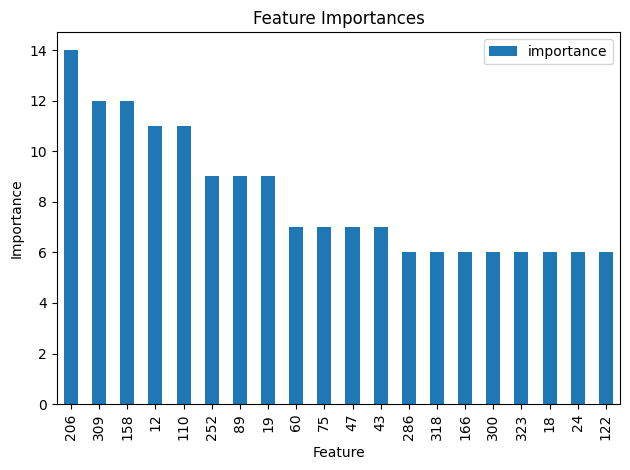

In [64]:
# Get the feature importances
feature_importances = final_xgb_model.get_booster().get_score(importance_type='weight')

# Convert the feature importances to a DataFrame
feature_importances = pd.DataFrame(feature_importances.items(), columns=['feature', 'importance'])

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 most important features
print("Top 10 Important Features:")
print(feature_importances.head(10))

# Plot the top 20 most important features
plt.figure(figsize=(10, 6))
feature_importances.head(20).plot.bar(x='feature', y='importance')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df.head()